## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

[0.88548559]


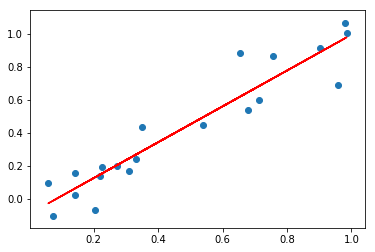

In [50]:
# you code here
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.random.random(20)
Y = np.random.normal(X,0.1,20)
data = np.array([X,Y])
class LR():
    def __init__(self,data):
        self.data = data
        self.reg = LinearRegression().fit(data[0,:].reshape(-1,1),data[1,:])
        
    def plot(self):
        plt.scatter(self.data[0,:], self.data[1,:])
        plt.plot(self.data[0,:], self.F(self.data[0,:]), color='red')
        
    def F(self,X):
        return self.reg.coef_ * X + self.reg.intercept_
    
    def predict(self,X):
        return self.reg.predict([[X]])

LR_model = LR(data)
print(LR_model.predict(0.9))
LR_model.plot()

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [86]:
import numpy as np
X = np.random.random(20)
Y = np.random.normal(3*X+0.4,0.1,20)
data = np.array([X,Y]).T
data = tuple(data)
def distance(p1,p2):
    dis = np.abs(p1-p2)
    return dis
def KNN(x,k=5):
    most_similars = sorted(data, key=lambda xi: distance(xi[0], x))[:k]
    y_hat = [y for _x,y in most_similars]
    return np.mean(y_hat)
KNN(0.5)

1.8750481234670429

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

In [148]:
import pandas as pd
mock_data = {
    'gender':['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
    'pet': [1, 1, 1, 0, 0, 0, 0],
    'bought': [1, 0, 1, 0, 0, 0, 1],
}
dataset = pd.DataFrame.from_dict(mock_data)

In [15]:
dataset[dataset['gender']=='F'].drop(columns='gender')

,income,family_number,pet,bought
0,+10,1,1,1
1,-10,1,1,1
2,+10,2,0,1
3,+10,1,1,0


In [154]:
from collections import Counter
import numpy as np

class Decision_Tree():
    def __init__(self,target='bought'):
        self.target = target
        
        
    def find_optimal(self,subset):
        feature_name = set(subset.keys().to_list())-{self.target}
        min_entropy = float('inf')
        spliter = ''
        for possibles in feature_name:
            values = set(subset[possibles])
            entropy = 0
            for v in values:
                entropy += self.entropy(subset[subset[possibles]==v][self.target].to_list())
            if entropy < min_entropy:
                min_entropy = entropy
                spliter = possibles
        return spliter
    
    def create_tree(self,dataset):
        feature = set(dataset.keys().to_list())-{self.target}
        root = self.find_optimal(dataset)
        target_class = dataset[self.target].to_list()
        counter = Counter(target_class)
        probs = [counter[c] / len(target_class) for c in set(target_class)]
        if probs[0] == 1.0 or root=='':
            return set(target_class)
        values = set(dataset[root]) 
        myTree={root:{}}
        for v in values:
            myTree[root][v]=self.create_tree(dataset[dataset[root]==v].drop(columns=root))
        return myTree
        
    def entropy(self,elements):
        counter = Counter(elements)
        probs = [counter[c] / len(elements) for c in set(elements)]
        return - sum(p * np.log(p) for p in probs)
    
New_tree = Decision_Tree()
My_tree = New_tree.create_tree(dataset)
My_tree

{'family_number': {1: {'income': {'+10': {'pet': {0: {0}, 1: {1}}},
    '-10': {0}}},
  2: {1}}}

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

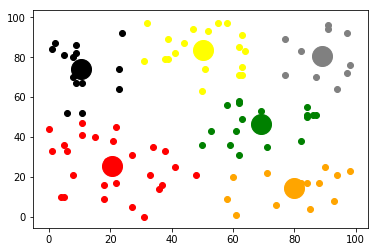

In [46]:
from sklearn.cluster import KMeans
import numpy.random as random
from collections import defaultdict
import matplotlib.pyplot as plt

X1 = [random.randint(0, 100) for _ in range(100)]
X2 = [random.randint(0, 100) for _ in range(100)]
cluster = KMeans(n_clusters=6, max_iter=500)
tranning_data = [[x1, x2] for x1, x2 in zip(X1, X2)]
cluster.fit(tranning_data)
centers = defaultdict(list)
for label, location in zip(cluster.labels_, tranning_data):
    centers[label].append(location)
color = ['red', 'green', 'grey', 'black', 'yellow', 'orange']

for i, c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])
    plt.scatter(*cluster.cluster_centers_[c], s=400, c=color[i])  

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

1. 模型是一种从特征到目标的映射.
2. 因为实际生活中的很多因素我们无法考虑到

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

1. 过拟合指模型过度学习训练数据, 使其在训练集上表现很好, 验证集表现很差; 欠拟合指模型无法学习到训练数据, 在训练集上表现很差
2. 过拟合一般由于模型的参数过多, 欠拟合一般由于参数过少

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

1. precision 精确率: 被准确预测为正的样本占总样本中正样本的比例
$$precision = \frac{TP}{TP+FP}$$

2. recall 召回率: 被准确预测为正的样本占所有预测为正的比例
$$recall = \frac{TP}{TP+FN}$$

3. AUC area under the curve: ROC曲线下面的面积积分, 面积越大, 模型越好


4. F1 score: 综合评价模型的指标

$$F_1 = \frac{2*precision*recall}{precision+recall}$$

5. F2 score: 

$$F_2 = 5 \cdot \frac{precision \cdot recall}{4\cdot precision + recall}$$

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

机器学习是数据驱动的, 传统分析式编程是逻辑驱动的

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

In [ ]:
正确定义机器学习的评价标准可以

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [161]:
new_data = {
    'gender':['F'],
    'income': ['+10'],
    'family_number': [2],
    'pet': [0]
}
new = pd.DataFrame.from_dict(new_data)
new

,gender,income,family_number,pet
0,F,+10,2,0


In [162]:
class pred_decision(Decision_Tree):
    def __init__(self,dataset):
        Decision_Tree.__init__(self,target='bought')
        self.tree = self.create_tree(dataset)
        
    def predicate(self,new):
        My_tree = self.tree
        
        def propagate(tree):
            if type(tree)==dict:
                for Node in tree.keys():
                    value = new[Node].to_list()[0]
                    return propagate(tree.get(Node).get(value))
            else:
                y = list(tree)
                return y[0]
        output = propagate(My_tree)
        return output
print(My_tree)    
pred_Tree = pred_decision(dataset)
pred_Tree.predicate(new)

{'family_number': {1: {'income': {'+10': {'pet': {0: {0}, 1: {1}}}, '-10': {0}}}, 2: {1}}}


1

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

## 没有见到上一节课的线性回归问题

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)